# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('Profissão- Cientista de Dados_M10_support material.csv')
df = df.iloc[:,1:].drop('index',axis=1)
df

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [3]:
df['mau'].value_counts()

False    14638
True       362
Name: mau, dtype: int64

In [4]:
df[['posse_de_veiculo']] = df[['posse_de_veiculo']].apply(lambda x: x + 0)
df[['posse_de_imovel']] = df[['posse_de_imovel']].apply(lambda x: x + 0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  int32  
 3   posse_de_imovel        15000 non-null  int32  
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  mau                    15000 non-null  bool   
 13  renda                  15000 non-null  float64
dtypes: bool(1), float64(3), int32(2), int64(2), object(6)


In [6]:
df.select_dtypes(['number','bool']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   posse_de_veiculo       15000 non-null  int32  
 1   posse_de_imovel        15000 non-null  int32  
 2   qtd_filhos             15000 non-null  int64  
 3   idade                  15000 non-null  int64  
 4   tempo_emprego          12466 non-null  float64
 5   qt_pessoas_residencia  15000 non-null  float64
 6   mau                    15000 non-null  bool   
 7   renda                  15000 non-null  float64
dtypes: bool(1), float64(3), int32(2), int64(2)
memory usage: 717.9 KB


In [7]:
df.corr()['renda']

posse_de_veiculo         0.063414
posse_de_imovel          0.029827
qtd_filhos               0.009567
idade                    0.042570
tempo_emprego            0.394235
qt_pessoas_residencia    0.020977
mau                     -0.011577
renda                    1.000000
Name: renda, dtype: float64

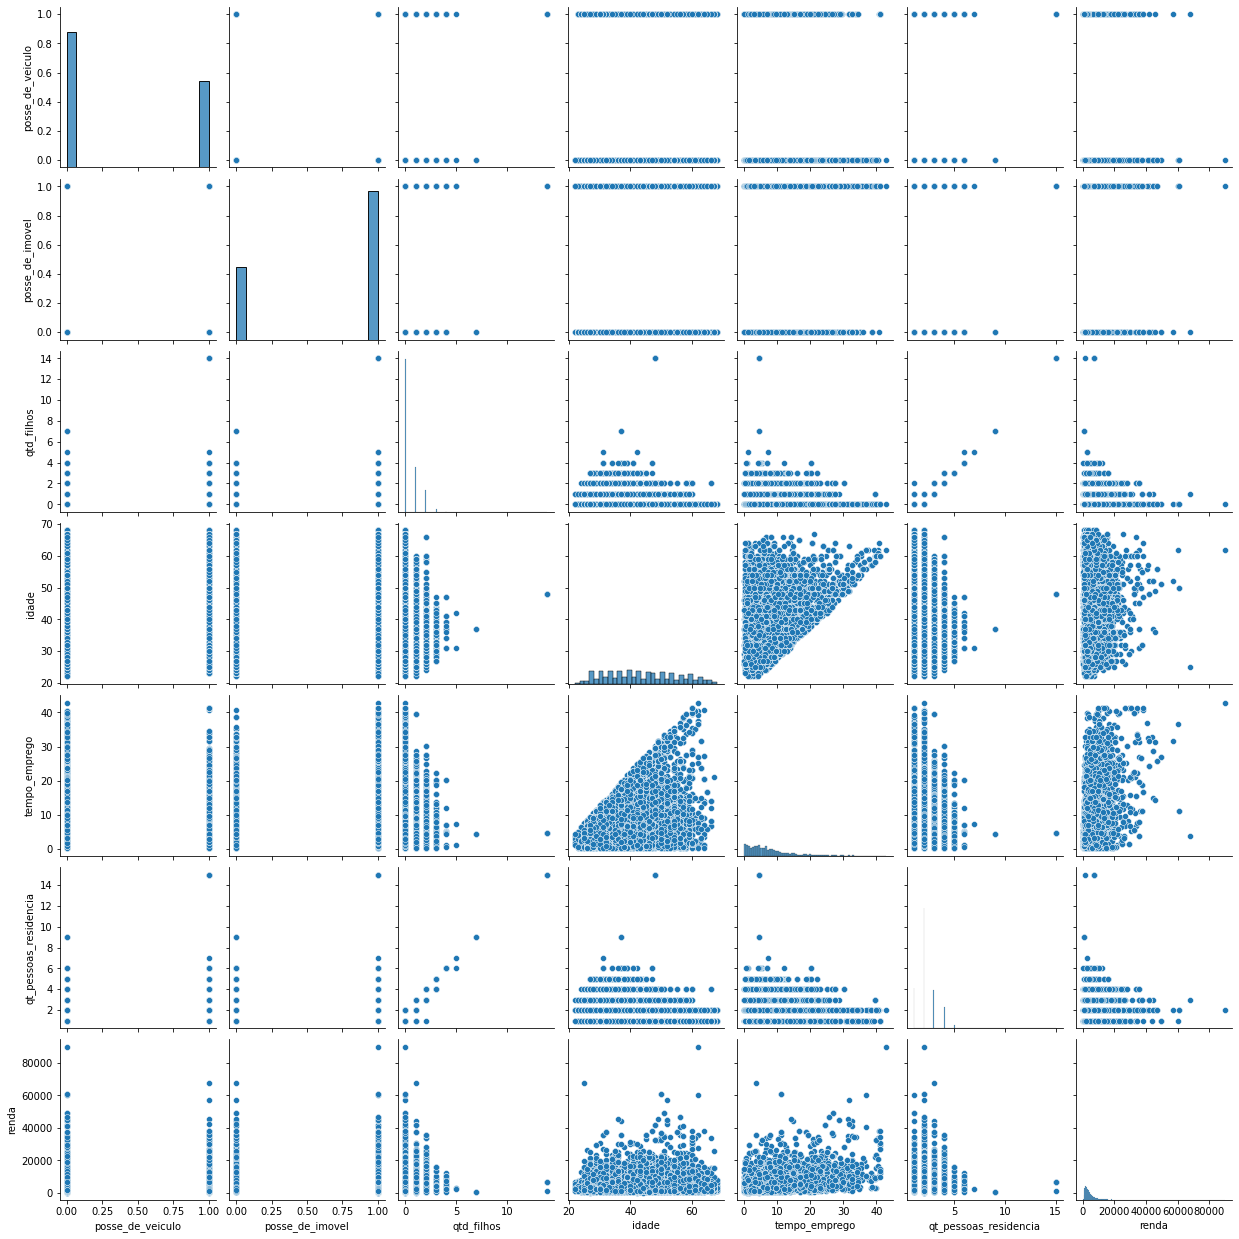

In [8]:
sns.pairplot(df[['posse_de_veiculo','posse_de_imovel','qtd_filhos', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda']])

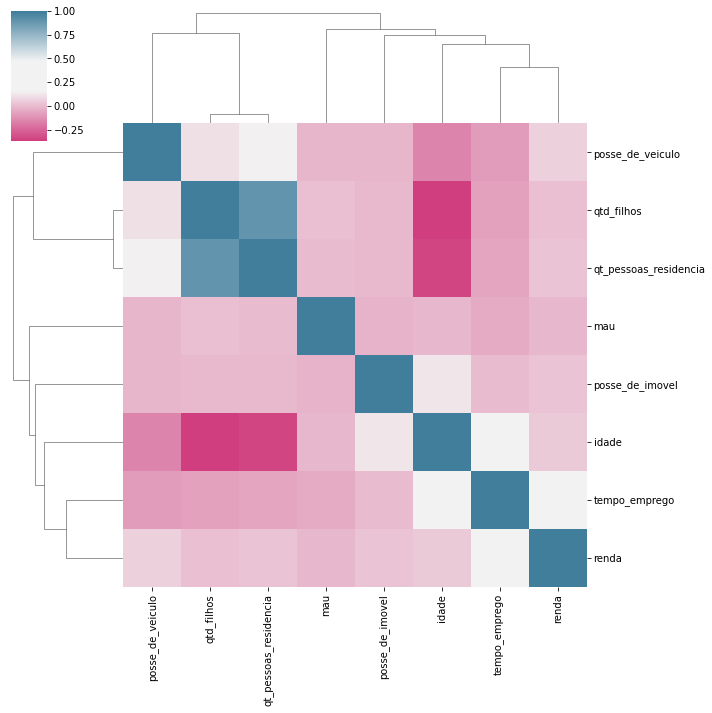

In [9]:
cmap = sns.diverging_palette(h_neg=350, h_pos=230, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df.corr(),cmap=cmap)

   - É possível verificar que a renda diminiu conforme a quantidade de filhos aumenta

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='qt_pessoas_residencia', ylabel='renda'>

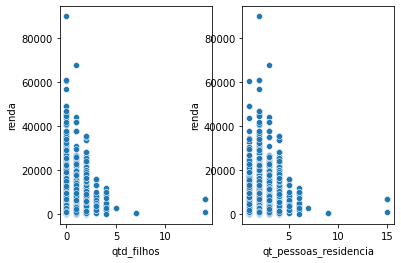

In [51]:
fig,axes = plt.subplots(nrows=1,ncols=2)
sns.scatterplot(data=df,y= 'renda', x= 'qtd_filhos',ax=axes[0])
sns.scatterplot(data=df,y= 'renda', x= 'qt_pessoas_residencia',ax=axes[1])

3) Na su aopinião, há outliers na variável renda?

<AxesSubplot:xlabel='renda'>

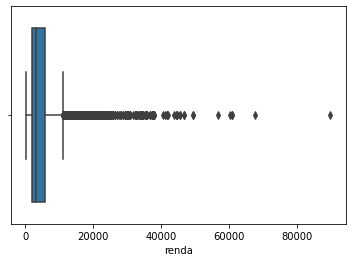

In [57]:
sns.boxplot(x=df['renda'])

   - sim, bastante

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [62]:
np.log(df['renda']).to_frame()

,renda
0,8.122442
1,8.715411
2,8.640999
3,8.888300
4,8.298383
...,...
14995,7.084469
14996,7.831689
14997,7.369506
14998,8.850144


<AxesSubplot:xlabel='renda'>

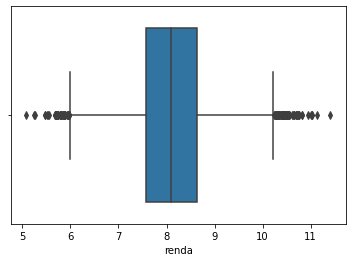

In [64]:
sns.boxplot(x=np.log(df['renda']))

5) A aplicação do LOG você acha que melhorou ou piorou a análise?